In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [44]:
#To plot a graph
def plot(column):
    for i in range(2):
        sns.kdeplot(data=df[df["hazardous"] == i][column], label = le.inverse_transform([i]))
    plt.legend();

#To get a normalized graph
def standard_plot(column):
    for i in range(2):
        sns.kdeplot(data=np.log(df[df["hazardous"] == i][column]), label = le.inverse_transform([i]))
    plt.legend();

In [4]:
df= pd.read_csv("neo_v2.csv")

In [5]:
df.head(5)

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [6]:
df.columns

Index(['id', 'name', 'est_diameter_min', 'est_diameter_max',
       'relative_velocity', 'miss_distance', 'orbiting_body', 'sentry_object',
       'absolute_magnitude', 'hazardous'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.7+ MB


In [8]:
df.corr()

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,sentry_object,absolute_magnitude,hazardous
id,1.000000,-0.148322,-0.148322,-0.059176,-0.056510,NaN,0.277258,-0.123443
est_diameter_min,-0.148322,1.000000,1.000000,0.221553,0.142241,NaN,-0.560188,0.183363
est_diameter_max,-0.148322,1.000000,1.000000,0.221553,0.142241,NaN,-0.560188,0.183363
relative_velocity,-0.059176,0.221553,0.221553,1.000000,0.327169,NaN,-0.353863,0.191185
miss_distance,-0.056510,0.142241,0.142241,0.327169,1.000000,NaN,-0.264168,0.042302
sentry_object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
absolute_magnitude,0.277258,-0.560188,-0.560188,-0.353863,-0.264168,NaN,1.000000,-0.365267
hazardous,-0.123443,0.183363,0.183363,0.191185,0.042302,NaN,-0.365267,1.000000


In [9]:
df["hazardous"].value_counts()

False    81996
True      8840
Name: hazardous, dtype: int64

In [10]:
df["sentry_object"].value_counts()

False    90836
Name: sentry_object, dtype: int64

In [11]:
df["orbiting_body"].value_counts()

Earth    90836
Name: orbiting_body, dtype: int64

In [12]:
df.columns

Index(['id', 'name', 'est_diameter_min', 'est_diameter_max',
       'relative_velocity', 'miss_distance', 'orbiting_body', 'sentry_object',
       'absolute_magnitude', 'hazardous'],
      dtype='object')

In [13]:
df = df.drop(['id','name','orbiting_body','sentry_object'], axis = 1)

In [14]:
df.head(5)

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,1.198271,2.679415,13569.249224,5.483974e+07,16.73,False
1,0.265800,0.594347,73588.726663,6.143813e+07,20.00,True
2,0.722030,1.614507,114258.692129,4.979872e+07,17.83,False
3,0.096506,0.215794,24764.303138,2.543497e+07,22.20,False
4,0.255009,0.570217,42737.733765,4.627557e+07,20.09,True


<AxesSubplot:>

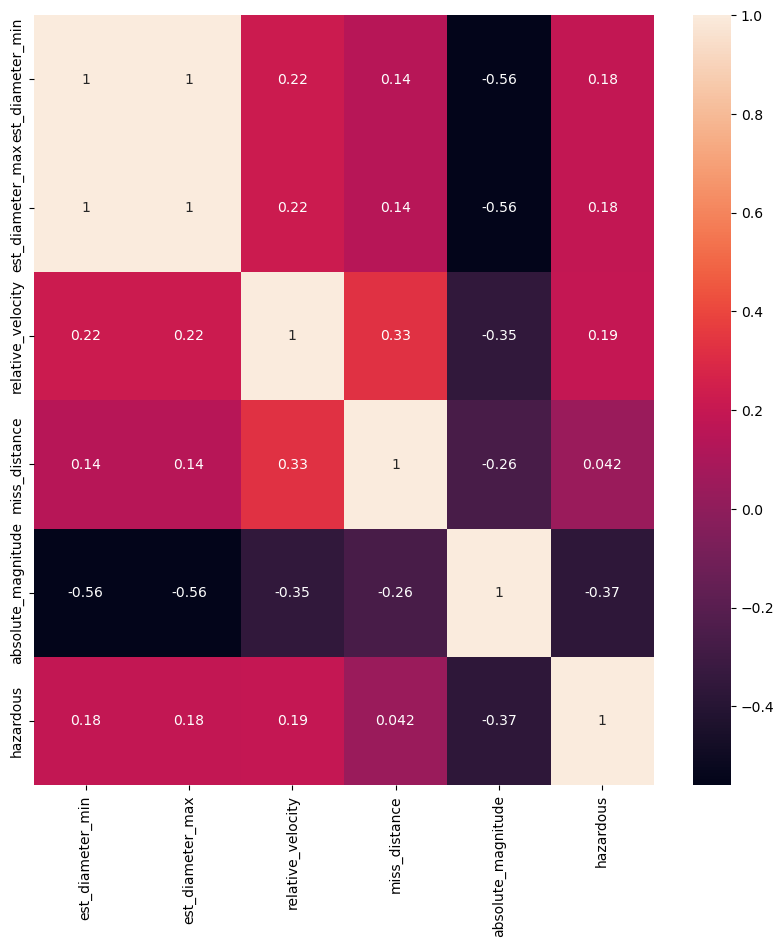

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["hazardous"] = le.fit_transform(df["hazardous"])
df["hazardous"] = df["hazardous"].astype(int)

In [17]:
df["hazardous"].unique()

array([0, 1])

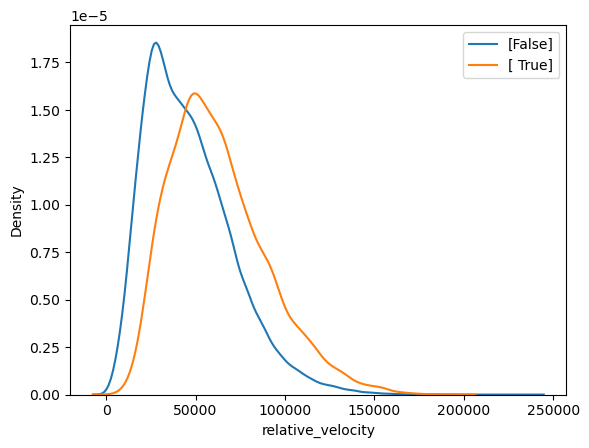

In [18]:
plot('relative_velocity')

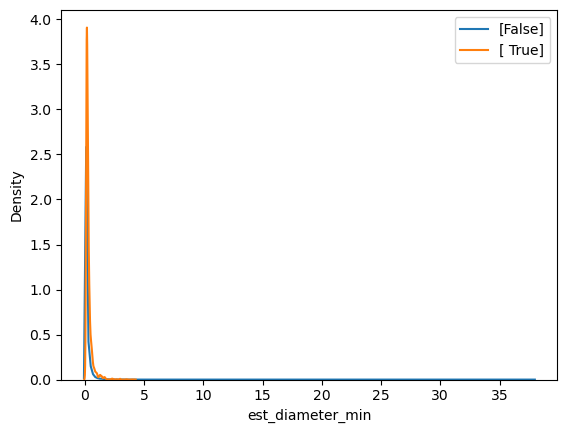

In [37]:
plot('est_diameter_min')

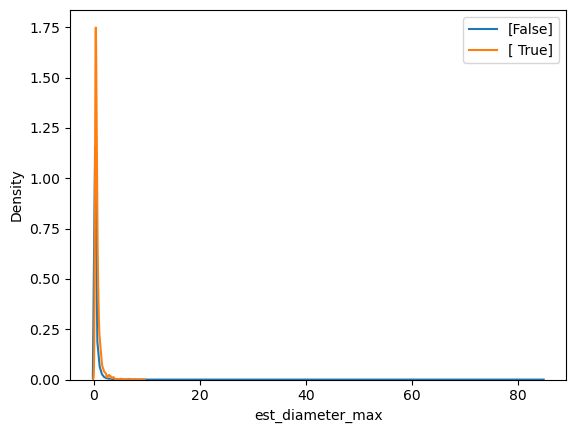

In [38]:
plot('est_diameter_max')

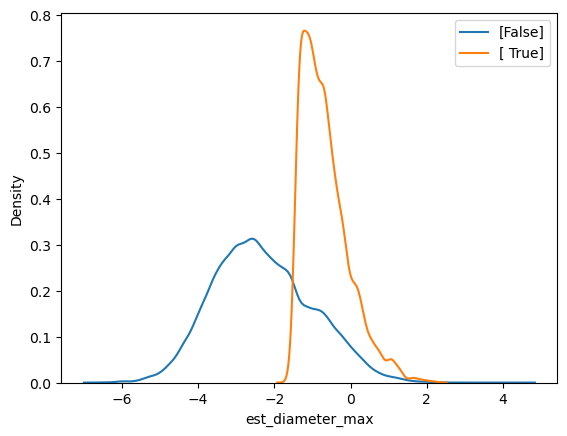

In [42]:
standard_plot('est_diameter_max')

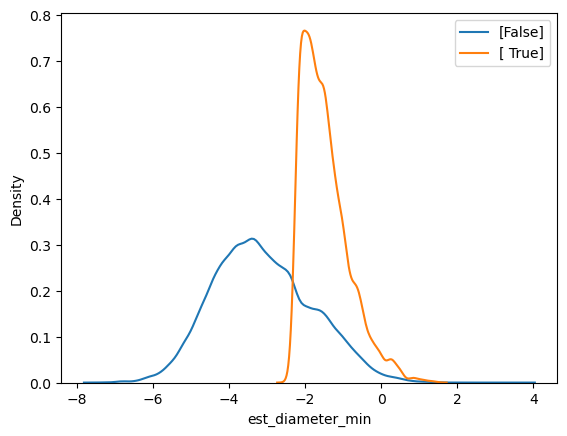

In [43]:
standard_plot('est_diameter_min')

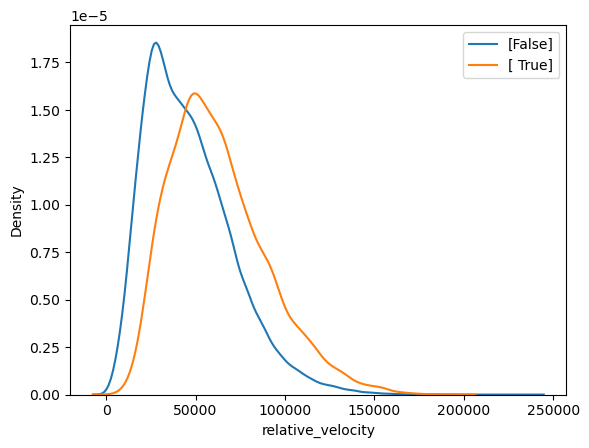

In [39]:
plot('relative_velocity')

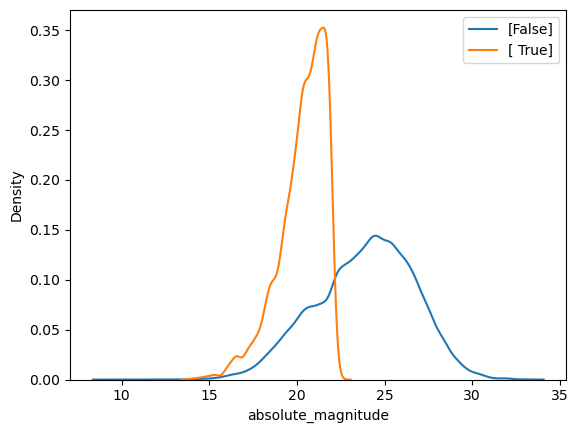

In [40]:
plot('absolute_magnitude')

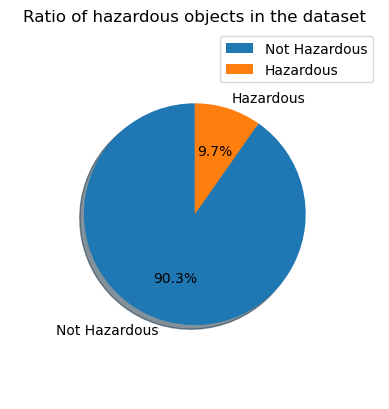

In [36]:
t =['Not Hazardous','Hazardous']
mylabels = list(t)
plt.pie(list(df['hazardous'].value_counts()),shadow = True, startangle = 90,labels = mylabels,autopct='%1.1f%%',radius = 0.75)
plt.legend()
plt.title("Ratio of hazardous objects in the dataset")
plt.show()

In [19]:
X = df.iloc[:,:5]
y = df.iloc[:,-1]

In [20]:
X

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
0,1.198271,2.679415,13569.249224,5.483974e+07,16.73
1,0.265800,0.594347,73588.726663,6.143813e+07,20.00
2,0.722030,1.614507,114258.692129,4.979872e+07,17.83
3,0.096506,0.215794,24764.303138,2.543497e+07,22.20
4,0.255009,0.570217,42737.733765,4.627557e+07,20.09
...,...,...,...,...,...
90831,0.026580,0.059435,52078.886692,1.230039e+07,25.00
90832,0.016771,0.037501,46114.605073,5.432121e+07,26.00
90833,0.031956,0.071456,7566.807732,2.840077e+07,24.60
90834,0.007321,0.016370,69199.154484,6.869206e+07,27.80


In [21]:
y

0        0
1        1
2        0
3        0
4        1
        ..
90831    0
90832    0
90833    0
90834    0
90835    0
Name: hazardous, Length: 90836, dtype: int32

In [22]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler()
X = mms.fit_transform(X)

In [23]:
X

array([[3.16072151e-02, 3.16072151e-02, 5.64469972e-02, 7.33140811e-01,
        3.12891114e-01],
       [6.99859604e-03, 6.99859603e-03, 3.09921777e-01, 8.21364026e-01,
        4.49311640e-01],
       [1.90388437e-02, 1.90388437e-02, 4.81679530e-01, 6.65740213e-01,
        3.58781811e-01],
       ...,
       [8.27278640e-04, 8.27278640e-04, 3.10974339e-02, 3.79640314e-01,
        6.41218189e-01],
       [1.77130266e-04, 1.77130265e-04, 2.91383698e-01, 9.18352249e-01,
        7.74718398e-01],
       [1.03590911e-03, 1.03590911e-03, 1.13271142e-01, 7.99088943e-01,
        6.21193158e-01]])

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42,shuffle = True)

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.metrics import plot_confusion_matrix

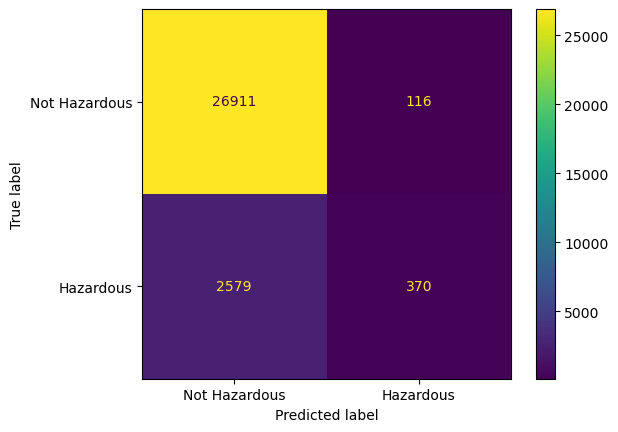

Accuracy score of KNN Classifier: 0.9100947424606352
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     27027
           1       0.76      0.13      0.22      2949

    accuracy                           0.91     29976
   macro avg       0.84      0.56      0.58     29976
weighted avg       0.90      0.91      0.88     29976



In [27]:
KNN_classifier = KNeighborsClassifier(n_neighbors = 50,metric = 'minkowski',p = 2)
KNN_classifier.fit(x_train,y_train)
labels = ['Not Hazardous','Hazardous']
plot_confusion_matrix(KNN_classifier, x_test, y_test,display_labels = labels)  
plt.show()
y_pred = KNN_classifier.predict(x_test)
acc_knn = accuracy_score(y_test, y_pred)
print("Accuracy score of KNN Classifier:",acc_knn)
print(classification_report(y_test,y_pred))

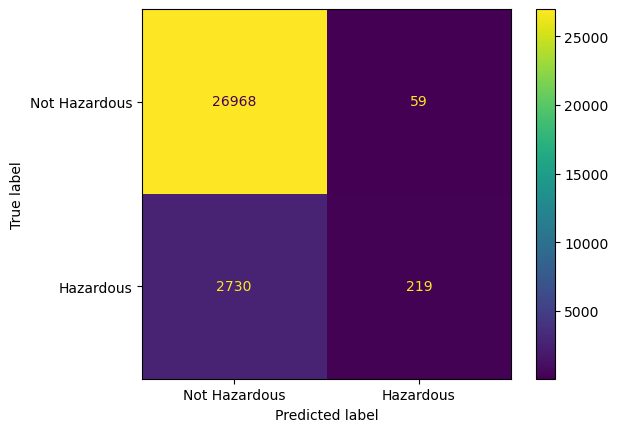

Accuracy score of SV Classifier: 0.9069589004536963
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     27027
           1       0.79      0.07      0.14      2949

    accuracy                           0.91     29976
   macro avg       0.85      0.54      0.54     29976
weighted avg       0.90      0.91      0.87     29976



In [28]:
SV_classifier = SVC(kernel = 'rbf',random_state = 42)
SV_classifier.fit(x_train,y_train)
labels = ['Not Hazardous','Hazardous']
plot_confusion_matrix(SV_classifier, x_test, y_test,display_labels = labels)  
plt.show()
y_pred = SV_classifier.predict(x_test)
acc_svc = accuracy_score(y_test, y_pred)
print("Accuracy score of SV Classifier:",acc_svc)
print(classification_report(y_test,y_pred))

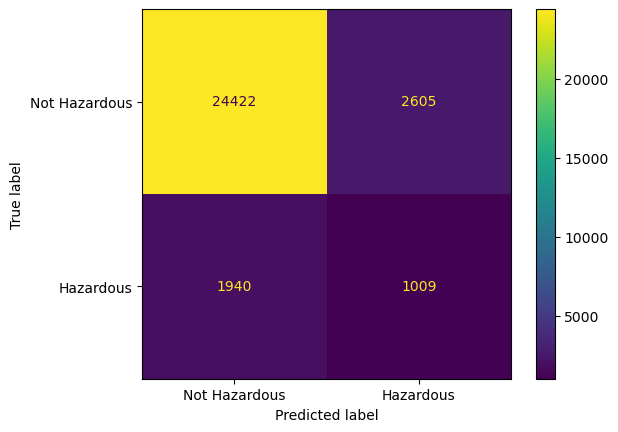

Accuracy score of SV Classifier: 0.84837870296237
              precision    recall  f1-score   support

           0       0.93      0.90      0.91     27027
           1       0.28      0.34      0.31      2949

    accuracy                           0.85     29976
   macro avg       0.60      0.62      0.61     29976
weighted avg       0.86      0.85      0.86     29976



In [29]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)
labels = ['Not Hazardous','Hazardous']
plot_confusion_matrix(nb, x_test, y_test,display_labels = labels)  
plt.show()
y_pred = nb.predict(x_test)
acc_gnb = accuracy_score(y_test, y_pred)
print("Accuracy score of SV Classifier:",acc_gnb)
print(classification_report(y_test,y_pred))

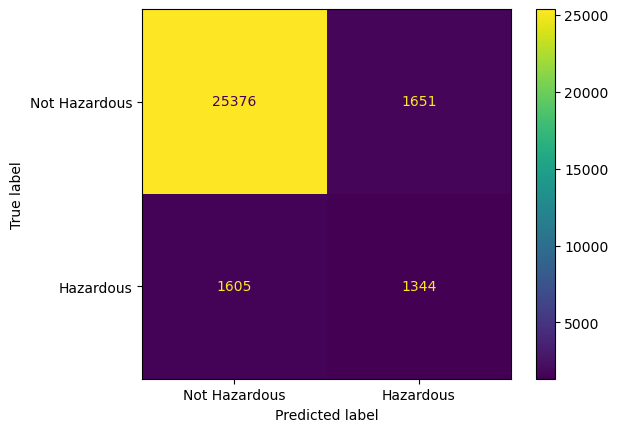

Accuracy score of Decision Tree Classifier: 0.8913797704830531
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     27027
           1       0.45      0.46      0.45      2949

    accuracy                           0.89     29976
   macro avg       0.69      0.70      0.70     29976
weighted avg       0.89      0.89      0.89     29976



In [30]:
Tree = DecisionTreeClassifier(criterion = 'entropy',random_state = 42)
Tree.fit(x_train,y_train)
labels = ['Not Hazardous','Hazardous']
plot_confusion_matrix(Tree, x_test, y_test,display_labels = labels)  
plt.show()
y_pred = Tree.predict(x_test)
acc_tree = accuracy_score(y_test, y_pred)
print("Accuracy score of Decision Tree Classifier:",acc_tree)
print(classification_report(y_test,y_pred))

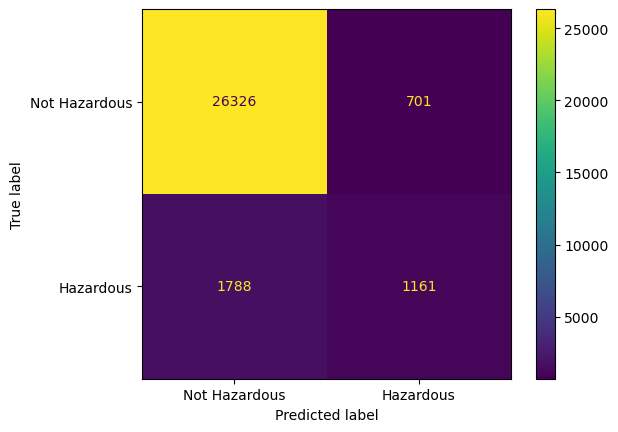

Accuracy score of Random Forest Classifier: 0.9169669068588204
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     27027
           1       0.62      0.39      0.48      2949

    accuracy                           0.92     29976
   macro avg       0.78      0.68      0.72     29976
weighted avg       0.91      0.92      0.91     29976



In [31]:
Forest = RandomForestClassifier(n_estimators = 500, criterion = 'entropy',random_state = 42)
Forest.fit(x_train,y_train)
labels = ['Not Hazardous','Hazardous']
plot_confusion_matrix(Forest, x_test, y_test,display_labels = labels)  
plt.show()
y_pred = Forest.predict(x_test)
acc_forest = accuracy_score(y_test, y_pred)
print("Accuracy score of Random Forest Classifier:",acc_forest)
print(classification_report(y_test,y_pred))

In [32]:
from sklearn.ensemble import GradientBoostingClassifier

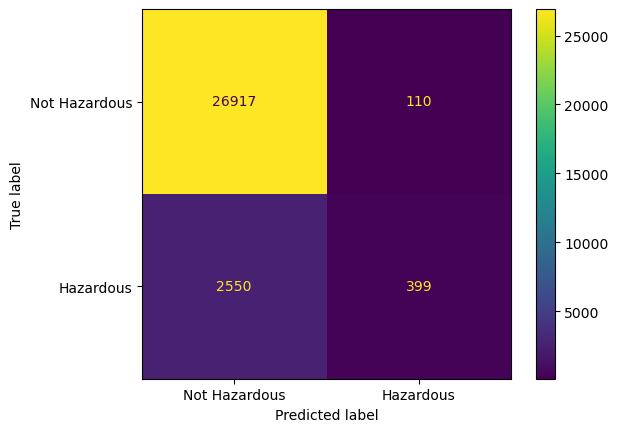

Accuracy score of Gradient Boosting Classifier: 0.9112623432078997
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     27027
           1       0.78      0.14      0.23      2949

    accuracy                           0.91     29976
   macro avg       0.85      0.57      0.59     29976
weighted avg       0.90      0.91      0.88     29976



In [33]:
gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)
labels = ['Not Hazardous','Hazardous']
plot_confusion_matrix(gbc, x_test, y_test,display_labels = labels)  
plt.show()
y_pred = gbc.predict(x_test)
acc_gbc = accuracy_score(y_test, y_pred)
print("Accuracy score of Gradient Boosting Classifier:",acc_gbc)
print(classification_report(y_test,y_pred))

In [34]:
print("Accuracy Score of different models")
print("Naive Bayes (Guassian): ",acc_gnb)
print("K Nearest Neighbors: ",acc_knn)
print("Support Vector Classifier: ",acc_svc)
print("Decision Tree Classifier: ",acc_tree)
print("Random Forest Classifier (100 estimators): ",acc_forest)
print("Gradient Boosting Classifier: ",acc_gbc)

Accuracy Score of different models
Naive Bayes (Guassian):  0.84837870296237
K Nearest Neighbors:  0.9100947424606352
Support Vector Classifier:  0.9069589004536963
Decision Tree Classifier:  0.8913797704830531
Random Forest Classifier (100 estimators):  0.9169669068588204
Gradient Boosting Classifier:  0.9112623432078997


In [35]:
print(max([acc_svc,acc_tree,acc_gbc,acc_knn,acc_gnb,acc_forest]))

0.9169669068588204
